Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Load Data Sets

In [4]:
bitcoin=pd.read_csv('Bitcoin Historical Data (1).csv', parse_dates=['Date'])
bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,"16,537.4","16,607.2","16,635.9","16,487.3",130.44K,-0.42%
1,2022-12-30,"16,607.2","16,636.4","16,644.4","16,360.0",192.76K,-0.18%
2,2022-12-29,"16,636.4","16,546.2","16,659.1","16,496.6",181.47K,0.55%
3,2022-12-28,"16,546.2","16,705.9","16,781.1","16,474.2",217.96K,-0.96%
4,2022-12-27,"16,706.1","16,918.2","16,964.0","16,610.1",192.18K,-1.25%
...,...,...,...,...,...,...,...
725,2021-01-05,"33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%
726,2021-01-04,"32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
727,2021-01-03,"32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
728,2021-01-02,"32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%


Check datatypes and check data for nulls

In [5]:
bitcoin.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

Change the datatype 

In [6]:
bitcoin['Price'] = bitcoin['Price'].replace(',', '', regex=True).astype(float)

In [7]:
bitcoin.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

Sort the dataframe from the oldest to newest date

In [8]:
bitcoin = bitcoin.sort_values(by='Date', ascending=True).reset_index(drop=True)
bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,29359.9,"28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,32193.3,"29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,32958.9,"32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,32022.6,"33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,33991.5,"32,015.4","34,414.7","30,010.5",202.13K,6.15%
...,...,...,...,...,...,...,...
725,2022-12-27,16706.1,"16,918.2","16,964.0","16,610.1",192.18K,-1.25%
726,2022-12-28,16546.2,"16,705.9","16,781.1","16,474.2",217.96K,-0.96%
727,2022-12-29,16636.4,"16,546.2","16,659.1","16,496.6",181.47K,0.55%
728,2022-12-30,16607.2,"16,636.4","16,644.4","16,360.0",192.76K,-0.18%


In [9]:
#bitcoin first year data
first_year_data = bitcoin.iloc[:365]
first_year_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,29359.9,"28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,32193.3,"29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,32958.9,"32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,32022.6,"33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,33991.5,"32,015.4","34,414.7","30,010.5",202.13K,6.15%
...,...,...,...,...,...,...,...
360,2021-12-27,50678.2,"50,783.6","52,016.3","50,459.0",43.90K,-0.20%
361,2021-12-28,47545.2,"50,703.4","50,703.8","47,345.7",74.39K,-6.18%
362,2021-12-29,46461.7,"47,548.4","48,121.7","46,127.8",63.92K,-2.28%
363,2021-12-30,47123.3,"46,470.7","47,901.4","46,003.0",60.96K,1.42%


In [10]:
first_year_data['Price'].describe()

count      365.00000
mean     47410.84000
std       9775.20937
min      29359.90000
25%      38297.60000
50%      47809.10000
75%      56207.10000
max      67527.90000
Name: Price, dtype: float64

In [11]:
#second year data
second_year_data = bitcoin.iloc[365:]
second_year_data

,Date,Price,Open,High,Low,Vol.,Change %
365,2022-01-01,47738.0,"46,217.5","47,917.6","46,217.5",31.24K,3.29%
366,2022-01-02,47311.8,"47,738.7","47,944.9","46,718.2",27.02K,-0.89%
367,2022-01-03,46430.2,"47,293.9","47,556.0","45,704.0",41.06K,-1.86%
368,2022-01-04,45837.3,"46,435.7","47,505.4","45,602.1",55.59K,-1.28%
369,2022-01-05,43425.9,"45,833.1","47,019.4","42,535.1",83.74K,-5.26%
...,...,...,...,...,...,...,...
725,2022-12-27,16706.1,"16,918.2","16,964.0","16,610.1",192.18K,-1.25%
726,2022-12-28,16546.2,"16,705.9","16,781.1","16,474.2",217.96K,-0.96%
727,2022-12-29,16636.4,"16,546.2","16,659.1","16,496.6",181.47K,0.55%
728,2022-12-30,16607.2,"16,636.4","16,644.4","16,360.0",192.76K,-0.18%


In [12]:
second_year_data['Price'].describe()

count      365.000000
mean     28185.670959
std      10192.406143
min      15776.200000
25%      19538.900000
50%      23153.000000
75%      39115.500000
max      47738.000000
Name: Price, dtype: float64

Create bitcoin_training_data dataframe, containing the data of Bitcoin for January 2021

In [13]:
bitcoin_training_data = bitcoin.head(31)
bitcoin_training_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,29359.9,"28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,32193.3,"29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,32958.9,"32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,32022.6,"33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,33991.5,"32,015.4","34,414.7","30,010.5",202.13K,6.15%
5,2021-01-06,36793.2,"33,999.3","36,934.8","33,408.3",227.56K,8.24%
6,2021-01-07,39460.2,"36,798.5","40,340.9","36,361.2",249.60K,7.25%
7,2021-01-08,40599.3,"39,466.4","41,921.7","36,613.4",251.29K,2.89%
8,2021-01-09,40151.9,"40,607.2","41,363.5","38,775.1",128.42K,-1.10%
9,2021-01-10,38192.2,"40,149.7","41,362.4","35,141.6",215.78K,-4.88%


Apply Moving Average on bitcoin_training_data

In [14]:
bitcoin_training_data['Moving_Avg'] = bitcoin_training_data['Price'].rolling(2).mean()
bitcoin_training_data

C:\Users\maria\AppData\Local\Temp\ipykernel_9812\1300929848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_training_data['Moving_Avg'] = bitcoin_training_data['Price'].rolling(2).mean()


,Date,Price,Open,High,Low,Vol.,Change %,Moving_Avg
0,2021-01-01,29359.9,"28,951.7","29,627.1","28,712.4",100.90K,1.42%,NaN
1,2021-01-02,32193.3,"29,359.7","33,233.5","29,008.0",240.87K,9.65%,30776.60
2,2021-01-03,32958.9,"32,192.9","34,755.9","32,029.6",155.21K,2.38%,32576.10
3,2021-01-04,32022.6,"33,016.6","33,587.5","28,204.5",255.27K,-2.84%,32490.75
4,2021-01-05,33991.5,"32,015.4","34,414.7","30,010.5",202.13K,6.15%,33007.05
5,2021-01-06,36793.2,"33,999.3","36,934.8","33,408.3",227.56K,8.24%,35392.35
6,2021-01-07,39460.2,"36,798.5","40,340.9","36,361.2",249.60K,7.25%,38126.70
7,2021-01-08,40599.3,"39,466.4","41,921.7","36,613.4",251.29K,2.89%,40029.75
8,2021-01-09,40151.9,"40,607.2","41,363.5","38,775.1",128.42K,-1.10%,40375.60
9,2021-01-10,38192.2,"40,149.7","41,362.4","35,141.6",215.78K,-4.88%,39172.05


Based on the Moving Average of january 2021, forecast the rest 11 months of 2021.

Create bitcoin_rest dataframe for the data of the rest months

In [15]:
bitcoin_rest=bitcoin.iloc[3:365]
bitcoin_rest.tail()

,Date,Price,Open,High,Low,Vol.,Change %
360,2021-12-27,50678.2,"50,783.6","52,016.3","50,459.0",43.90K,-0.20%
361,2021-12-28,47545.2,"50,703.4","50,703.8","47,345.7",74.39K,-6.18%
362,2021-12-29,46461.7,"47,548.4","48,121.7","46,127.8",63.92K,-2.28%
363,2021-12-30,47123.3,"46,470.7","47,901.4","46,003.0",60.96K,1.42%
364,2021-12-31,46219.5,"47,123.3","48,553.9","45,693.6",58.18K,-1.92%


In [16]:
forecast_start_date = bitcoin_training_data['Date'].max()
bitcoin_forecast = bitcoin_rest[bitcoin['Date'] > forecast_start_date].copy()
bitcoin_forecast['Forecast'] = bitcoin_training_data['Moving_Avg'].iloc[-1]
bitcoin_forecast

C:\Users\maria\AppData\Local\Temp\ipykernel_9812\345025347.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bitcoin_forecast = bitcoin_rest[bitcoin['Date'] > forecast_start_date].copy()


,Date,Price,Open,High,Low,Vol.,Change %,Forecast
31,2021-02-01,33515.7,"33,106.8","34,685.6","32,324.9",126.32K,1.23%,33695.6
32,2021-02-02,35485.2,"33,514.0","35,976.1","33,462.4",120.85K,5.88%,33695.6
33,2021-02-03,37646.8,"35,486.9","37,646.8","35,401.5",131.03K,6.09%,33695.6
34,2021-02-04,36982.1,"37,648.9","38,707.9","36,380.8",151.44K,-1.77%,33695.6
35,2021-02-05,38297.6,"36,976.4","38,303.6","36,640.0",100.60K,3.56%,33695.6
...,...,...,...,...,...,...,...,...
360,2021-12-27,50678.2,"50,783.6","52,016.3","50,459.0",43.90K,-0.20%,33695.6
361,2021-12-28,47545.2,"50,703.4","50,703.8","47,345.7",74.39K,-6.18%,33695.6
362,2021-12-29,46461.7,"47,548.4","48,121.7","46,127.8",63.92K,-2.28%,33695.6
363,2021-12-30,47123.3,"46,470.7","47,901.4","46,003.0",60.96K,1.42%,33695.6


Plot of the Moving Average

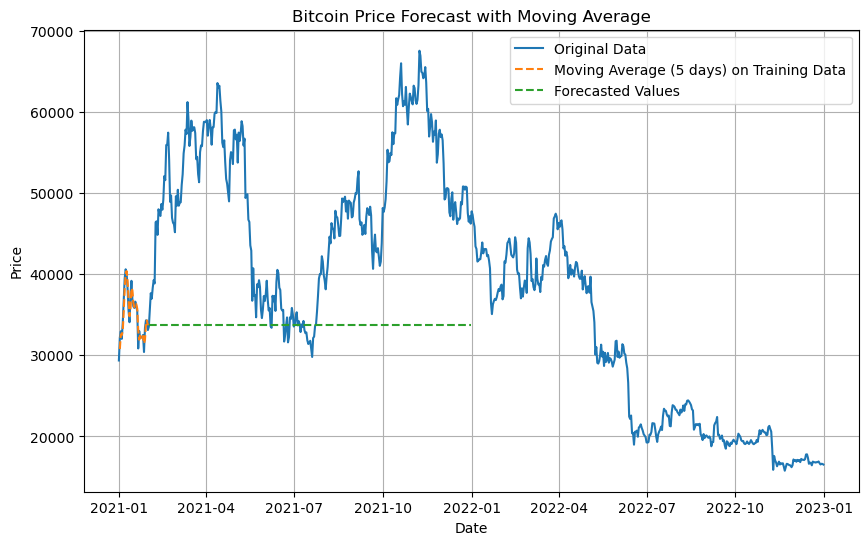

In [17]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(bitcoin['Date'], bitcoin['Price'], label='Original Data')

# Plot the moving average on the training data
plt.plot(bitcoin_training_data['Date'], bitcoin_training_data['Moving_Avg'], label=f'Moving Average ({5} days) on Training Data', linestyle='--')

# Plot the forecasted values
plt.plot(bitcoin_forecast['Date'], bitcoin_forecast['Forecast'], label='Forecasted Values', linestyle='--')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Forecast with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

Exponential Smoothing

Create bitcoin_input dataframe with data of January 2021

In [18]:
bitcoin_input=bitcoin.iloc[:31]
bitcoin_input

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,29359.9,"28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,32193.3,"29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,32958.9,"32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,32022.6,"33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,33991.5,"32,015.4","34,414.7","30,010.5",202.13K,6.15%
5,2021-01-06,36793.2,"33,999.3","36,934.8","33,408.3",227.56K,8.24%
6,2021-01-07,39460.2,"36,798.5","40,340.9","36,361.2",249.60K,7.25%
7,2021-01-08,40599.3,"39,466.4","41,921.7","36,613.4",251.29K,2.89%
8,2021-01-09,40151.9,"40,607.2","41,363.5","38,775.1",128.42K,-1.10%
9,2021-01-10,38192.2,"40,149.7","41,362.4","35,141.6",215.78K,-4.88%


Create bitcoin_rest_of_the_year dataframe for the rest months of 2021

In [19]:
bitcoin_rest_of_the_year=bitcoin.iloc[32:365]
bitcoin_rest_of_the_year.tail()

,Date,Price,Open,High,Low,Vol.,Change %
360,2021-12-27,50678.2,"50,783.6","52,016.3","50,459.0",43.90K,-0.20%
361,2021-12-28,47545.2,"50,703.4","50,703.8","47,345.7",74.39K,-6.18%
362,2021-12-29,46461.7,"47,548.4","48,121.7","46,127.8",63.92K,-2.28%
363,2021-12-30,47123.3,"46,470.7","47,901.4","46,003.0",60.96K,1.42%
364,2021-12-31,46219.5,"47,123.3","48,553.9","45,693.6",58.18K,-1.92%


Apply Exponential Smoothing 2021

In [20]:
#model = ExponentialSmoothing(bitcoin_input['Price'], seasonal_periods=7, initialization_method="estimated")
#fitted_model = model.fit()
#optimal_alpha = fitted_model.params['smoothing_level']
#rest_of_the_year_predictions = fitted_model.forecast(len(bitcoin_rest_of_the_year))
#rest_of_the_year_predictions

model = ExponentialSmoothing(bitcoin_input['Price'], seasonal_periods=7)
fitted_model = model.fit(smoothing_level=0.1)
rest_of_the_year_predictions_exp_smoothing = fitted_model.forecast(len(bitcoin_rest_of_the_year))
rest_of_the_year_predictions_exp_smoothing

31     33856.050619
32     33856.050619
33     33856.050619
34     33856.050619
35     33856.050619
           ...     
359    33856.050619
360    33856.050619
361    33856.050619
362    33856.050619
363    33856.050619
Length: 333, dtype: float64

In [21]:
#optimal_alpha

Exponential Smoothing Plot

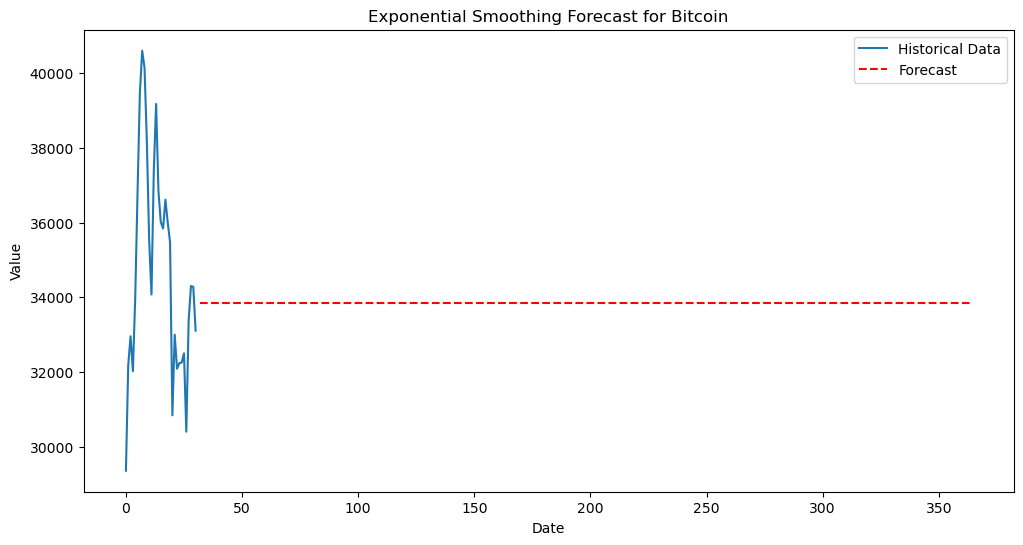

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_input.index, bitcoin_input['Price'], label='Historical Data')
plt.plot(bitcoin_rest_of_the_year.index, rest_of_the_year_predictions_exp_smoothing, label='Forecast', linestyle='--', color='red')
plt.title('Exponential Smoothing Forecast for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Naive Method

In [23]:
lastdateofjanuary = bitcoin.groupby(['Date'])
lastdateofjanuary.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,29359.9,"28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,32193.3,"29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,32958.9,"32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,32022.6,"33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,33991.5,"32,015.4","34,414.7","30,010.5",202.13K,6.15%
...,...,...,...,...,...,...,...
725,2022-12-27,16706.1,"16,918.2","16,964.0","16,610.1",192.18K,-1.25%
726,2022-12-28,16546.2,"16,705.9","16,781.1","16,474.2",217.96K,-0.96%
727,2022-12-29,16636.4,"16,546.2","16,659.1","16,496.6",181.47K,0.55%
728,2022-12-30,16607.2,"16,636.4","16,644.4","16,360.0",192.76K,-0.18%


In [24]:
lastdayofjanuary = bitcoin.loc[[30]]
print(lastdayofjanuary)

         Date    Price      Open      High       Low     Vol. Change %
30 2021-01-31  33108.1  34,281.6  34,348.3  32,189.9  101.92K   -3.43%


In [25]:
closingpricejanuary = lastdayofjanuary['Price'].values[0]
closingpricejanuary

33108.1

Naive forecast for months February to December 2021: 33108.1


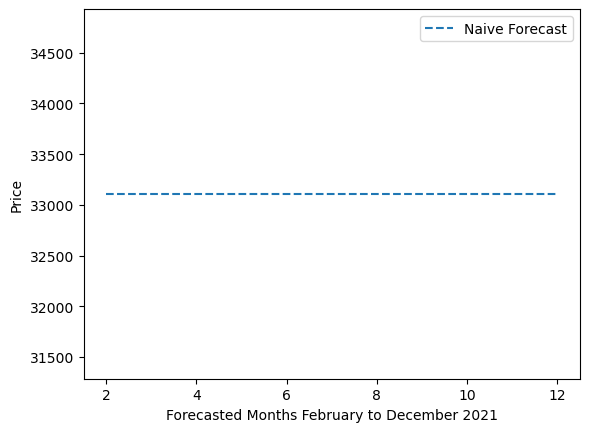

In [26]:
print("Naive forecast for months February to December 2021:", closingpricejanuary)

# Create forecast values for all months 2-12
forecast_values = [closingpricejanuary] * 11

# Add the forecast values to the DataFrame
forecast_dates = pd.date_range(start=lastdayofjanuary.index[0], periods=11, freq='MS')
forecast_df = pd.DataFrame({'date': forecast_dates, 'price': forecast_values})

plt.plot(range(2,13),forecast_df['price'], label='Naive Forecast', linestyle='dashed')
plt.ylabel('Price')
plt.xlabel('Forecasted Months February to December 2021')
plt.legend()
plt.show()

Holt’s Trend-corrected Adaptive Exponential Smoothing 2021

In [27]:
bitcoin_input['time_index'] = np.arange(1,np.size(bitcoin_input['Price'])+1)


C:\Users\maria\AppData\Local\Temp\ipykernel_9812\3259756823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_input['time_index'] = np.arange(1,np.size(bitcoin_input['Price'])+1)


In [28]:
import numpy as np
import pandas as pd 
import datetime
import matplotlib.pyplot as plt 
from statsmodels.regression import linear_model
from statsmodels.api import add_constant
plt.ioff()

Y = bitcoin_input['Price']
X = add_constant(range(1,len(Y)+1))  # the independent variable will have values considered [1, 2, 3, 4, ..., 31==len(Y)], and the model will also contain a constant term
model = linear_model.OLS(Y, X)

results = model.fit()
a = results.params[0]
b = results.params[1]

print(a, b)



36104.53419354838 -84.9656451612905


In [29]:
# Perform trend-adjusted exponential smoothing
trend_adjusted_forecast = a + b * (len(Y) + 1) 

# Print the forecasted value
print("Trend-Adjusted Forecast:", trend_adjusted_forecast)

Trend-Adjusted Forecast: 33385.633548387086


In [30]:
#model = ExponentialSmoothing(litecoin_input['Price'], trend='add', seasonal='add', seasonal_periods=15)
#fitted_model = model.fit(smoothing_level=36104.53, smoothing_trend=-84.96)
#rest_of_the_year_predictions = fitted_model.forecast(len(litecoin_rest_of_the_year))
#rest_of_the_year_predictions

In [31]:
model = ExponentialSmoothing(bitcoin_input['Price'], trend='add', seasonal='add', seasonal_periods=3)
fitted_model = model.fit(smoothing_level=0.2, smoothing_trend=0.3)
rest_of_the_year_predictions_trend = fitted_model.forecast(len(bitcoin_rest_of_the_year))
rest_of_the_year_predictions_trend

31     33498.084635
32     32694.400408
33     33302.356414
34     33777.356277
35     32973.672050
           ...     
359    63135.009371
360    63742.965377
361    64217.965239
362    63414.281013
363    64022.237019
Length: 333, dtype: float64

In [32]:
rest_of_the_year_predictions_trend.mean()

48524.88745480728

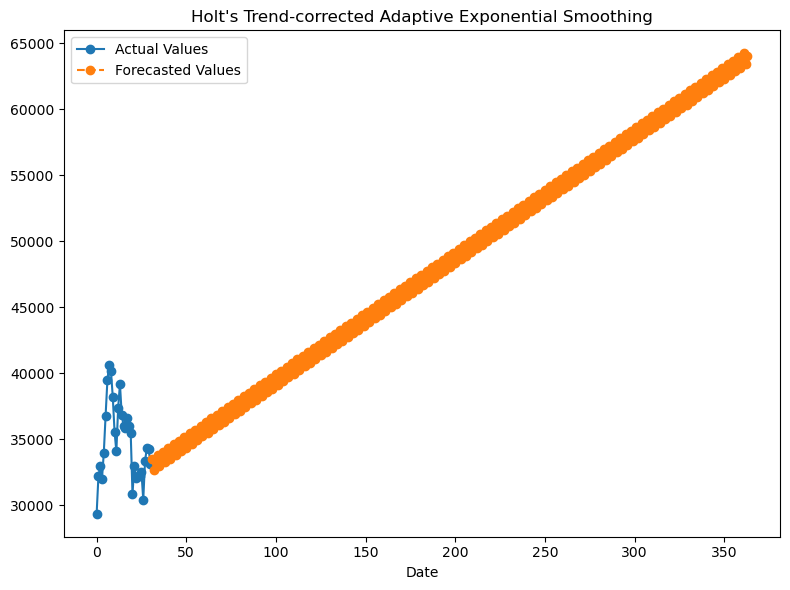

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(bitcoin_input['Price'], label='Actual Values', marker='o')
plt.plot(rest_of_the_year_predictions_trend, label='Forecasted Values', marker='o', linestyle='dashed')

plt.title("Holt's Trend-corrected Adaptive Exponential Smoothing")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

Seasonality

In [34]:
model = ExponentialSmoothing(bitcoin_input['Price'], trend='add', seasonal='add', seasonal_periods=3)
fitted_model = model.fit(smoothing_level=0.2, smoothing_trend=0.3, smoothing_seasonal=0.7)
rest_of_the_year_predictions_seasonality = fitted_model.forecast(len(bitcoin_rest_of_the_year))
rest_of_the_year_predictions_seasonality

31     34686.989994
32     34007.592905
33     34235.479025
34     34918.920478
35     34239.523388
           ...     
359    59288.015596
360    59515.901717
361    60199.343169
362    59519.946080
363    59747.832200
Length: 333, dtype: float64

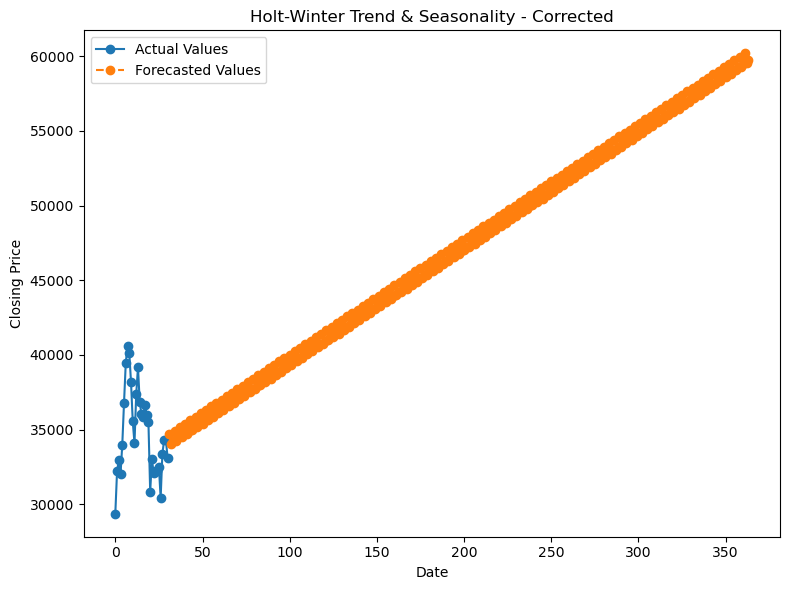

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(bitcoin_input['Price'], label='Actual Values', marker='o')
plt.plot(rest_of_the_year_predictions_seasonality, label='Forecasted Values', marker='o', linestyle='dashed')

plt.title("Holt-Winter Trend & Seasonality - Corrected")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
#optimal_alpha

In [37]:
#optimal_beta

In [38]:
#optimal_gamma

In [39]:
rest_of_the_year_predictions_seasonality.mean()

47066.197228852885

Apply Moving Average for year 2022

Create dataframe for January 2022 and dataframe for the rest months of 2022

In [40]:
bitcoin_january_2022=bitcoin.iloc[365:396]
bitcoin_january_2022

,Date,Price,Open,High,Low,Vol.,Change %
365,2022-01-01,47738.0,"46,217.5","47,917.6","46,217.5",31.24K,3.29%
366,2022-01-02,47311.8,"47,738.7","47,944.9","46,718.2",27.02K,-0.89%
367,2022-01-03,46430.2,"47,293.9","47,556.0","45,704.0",41.06K,-1.86%
368,2022-01-04,45837.3,"46,435.7","47,505.4","45,602.1",55.59K,-1.28%
369,2022-01-05,43425.9,"45,833.1","47,019.4","42,535.1",83.74K,-5.26%
370,2022-01-06,43097.5,"43,431.6","43,772.3","42,481.1",63.08K,-0.76%
371,2022-01-07,41546.7,"43,097.9","43,127.7","40,810.0",88.36K,-3.60%
372,2022-01-08,41672.0,"41,551.3","42,304.4","40,574.3",52.54K,0.30%
373,2022-01-09,41848.3,"41,681.2","42,764.4","41,260.9",37.51K,0.42%
374,2022-01-10,41832.2,"41,848.9","42,243.8","39,697.0",85.50K,-0.04%


In [41]:
bitcoin_rest_2022=bitcoin.iloc[396:]
bitcoin_rest_2022

,Date,Price,Open,High,Low,Vol.,Change %
396,2022-02-01,38709.7,"38,475.6","39,230.0","38,037.9",55.20K,0.55%
397,2022-02-02,36890.2,"38,711.2","38,853.8","36,682.3",53.74K,-4.70%
398,2022-02-03,37287.8,"36,890.2","37,304.3","36,297.3",50.35K,1.08%
399,2022-02-04,41567.6,"37,287.8","41,689.0","37,041.1",95.49K,11.48%
400,2022-02-05,41412.1,"41,566.5","41,899.8","40,963.3",46.32K,-0.37%
...,...,...,...,...,...,...,...
725,2022-12-27,16706.1,"16,918.2","16,964.0","16,610.1",192.18K,-1.25%
726,2022-12-28,16546.2,"16,705.9","16,781.1","16,474.2",217.96K,-0.96%
727,2022-12-29,16636.4,"16,546.2","16,659.1","16,496.6",181.47K,0.55%
728,2022-12-30,16607.2,"16,636.4","16,644.4","16,360.0",192.76K,-0.18%


Apply Moving Average on bitcoin_january_2022

In [42]:
bitcoin_january_2022['Moving_Avg'] = bitcoin_january_2022['Price'].rolling(2).mean()
bitcoin_january_2022

C:\Users\maria\AppData\Local\Temp\ipykernel_9812\3496940996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_january_2022['Moving_Avg'] = bitcoin_january_2022['Price'].rolling(2).mean()


,Date,Price,Open,High,Low,Vol.,Change %,Moving_Avg
365,2022-01-01,47738.0,"46,217.5","47,917.6","46,217.5",31.24K,3.29%,NaN
366,2022-01-02,47311.8,"47,738.7","47,944.9","46,718.2",27.02K,-0.89%,47524.90
367,2022-01-03,46430.2,"47,293.9","47,556.0","45,704.0",41.06K,-1.86%,46871.00
368,2022-01-04,45837.3,"46,435.7","47,505.4","45,602.1",55.59K,-1.28%,46133.75
369,2022-01-05,43425.9,"45,833.1","47,019.4","42,535.1",83.74K,-5.26%,44631.60
370,2022-01-06,43097.5,"43,431.6","43,772.3","42,481.1",63.08K,-0.76%,43261.70
371,2022-01-07,41546.7,"43,097.9","43,127.7","40,810.0",88.36K,-3.60%,42322.10
372,2022-01-08,41672.0,"41,551.3","42,304.4","40,574.3",52.54K,0.30%,41609.35
373,2022-01-09,41848.3,"41,681.2","42,764.4","41,260.9",37.51K,0.42%,41760.15
374,2022-01-10,41832.2,"41,848.9","42,243.8","39,697.0",85.50K,-0.04%,41840.25


Based on the Moving Average of january 2022, forecast the rest 11 months of 2022.

In [43]:
forecast_start_date = bitcoin_january_2022['Date'].max()
bitcoin_forecast_2022 = bitcoin_rest_2022[bitcoin['Date'] > forecast_start_date].copy()
bitcoin_forecast_2022['Forecast'] = bitcoin_january_2022['Moving_Avg'].iloc[-1]
bitcoin_forecast_2022

C:\Users\maria\AppData\Local\Temp\ipykernel_9812\86093006.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bitcoin_forecast_2022 = bitcoin_rest_2022[bitcoin['Date'] > forecast_start_date].copy()


,Date,Price,Open,High,Low,Vol.,Change %,Forecast
396,2022-02-01,38709.7,"38,475.6","39,230.0","38,037.9",55.20K,0.55%,38208.15
397,2022-02-02,36890.2,"38,711.2","38,853.8","36,682.3",53.74K,-4.70%,38208.15
398,2022-02-03,37287.8,"36,890.2","37,304.3","36,297.3",50.35K,1.08%,38208.15
399,2022-02-04,41567.6,"37,287.8","41,689.0","37,041.1",95.49K,11.48%,38208.15
400,2022-02-05,41412.1,"41,566.5","41,899.8","40,963.3",46.32K,-0.37%,38208.15
...,...,...,...,...,...,...,...,...
725,2022-12-27,16706.1,"16,918.2","16,964.0","16,610.1",192.18K,-1.25%,38208.15
726,2022-12-28,16546.2,"16,705.9","16,781.1","16,474.2",217.96K,-0.96%,38208.15
727,2022-12-29,16636.4,"16,546.2","16,659.1","16,496.6",181.47K,0.55%,38208.15
728,2022-12-30,16607.2,"16,636.4","16,644.4","16,360.0",192.76K,-0.18%,38208.15


Plot for Moving Average 2022

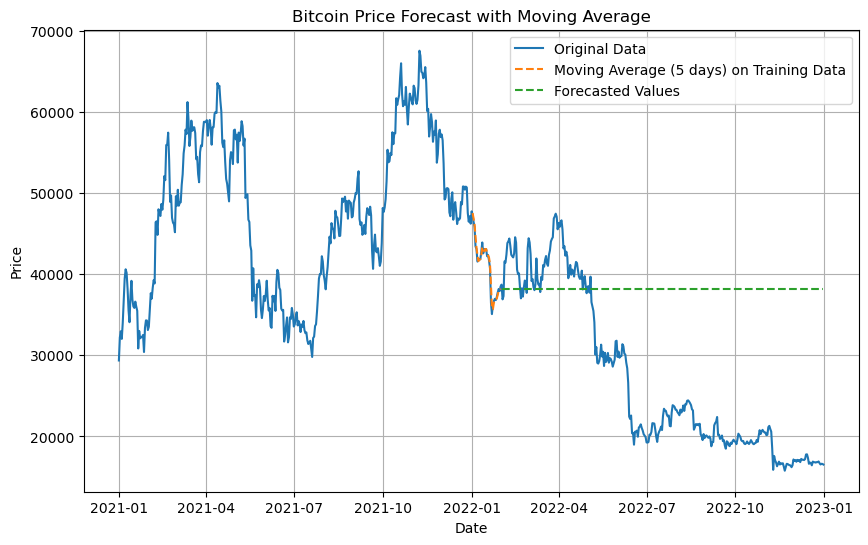

In [44]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(bitcoin['Date'], bitcoin['Price'], label='Original Data')

# Plot the moving average on the training data
plt.plot(bitcoin_january_2022['Date'], bitcoin_january_2022['Moving_Avg'], label=f'Moving Average ({5} days) on Training Data', linestyle='--')

# Plot the forecasted values
plt.plot(bitcoin_forecast_2022['Date'], bitcoin_forecast_2022['Forecast'], label='Forecasted Values', linestyle='--')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Forecast with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

Exponential Smoothing for 2022

In [45]:
model = ExponentialSmoothing(bitcoin_january_2022['Price'], seasonal_periods=7, initialization_method="estimated")
fitted_model = model.fit()
optimal_alpha = fitted_model.params['smoothing_level']
rest_of_the_year_predictions_2022 = fitted_model.forecast(len(bitcoin_rest_2022))
rest_of_the_year_predictions_2022


396    38495.701774
397    38495.701774
398    38495.701774
399    38495.701774
400    38495.701774
           ...     
725    38495.701774
726    38495.701774
727    38495.701774
728    38495.701774
729    38495.701774
Length: 334, dtype: float64

Exponential Smoothing Plot 2022

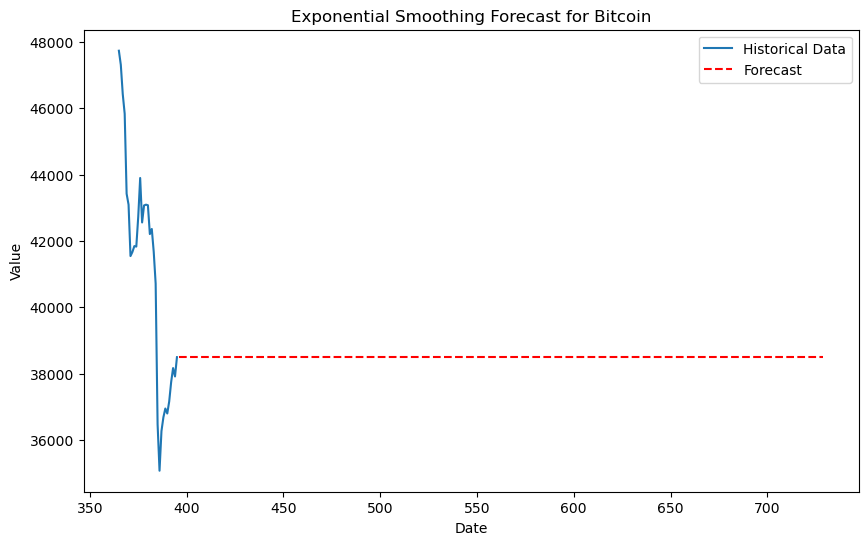

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_january_2022.index, bitcoin_january_2022['Price'], label='Historical Data')
plt.plot(bitcoin_rest_2022.index, rest_of_the_year_predictions_2022, label='Forecast', linestyle='--', color='red')
plt.title('Exponential Smoothing Forecast for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [47]:
optimal_alpha

0.995

Naive Method for 2022

In [48]:
lastdayofjanuary2022 = bitcoin.loc[[395]]
print(lastdayofjanuary2022)

          Date    Price      Open      High       Low    Vol. Change %
395 2022-01-31  38498.6  37,923.8  38,701.4  36,672.8  61.27K    1.53%


In [49]:
closingpricejanuary2022 = lastdayofjanuary2022['Price'].values[0]
closingpricejanuary2022

38498.6

Naive forecast for months February to December 2022: 38498.6


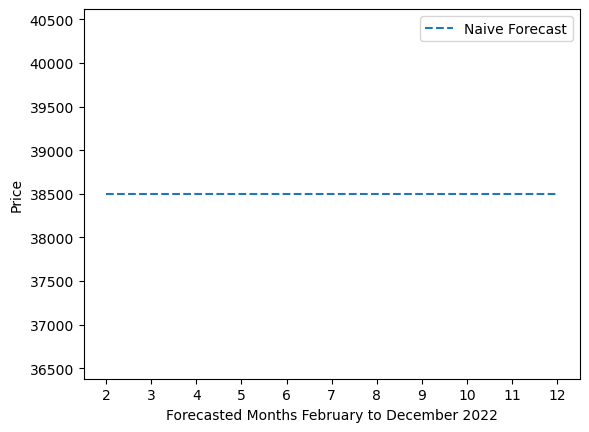

In [50]:
print("Naive forecast for months February to December 2022:", closingpricejanuary2022)

# Create forecast values for all months 2-12
forecast_values = [closingpricejanuary2022] * 11

# Add the forecast values to the DataFrame
forecast_dates = pd.date_range(start=lastdayofjanuary2022.index[0], periods=11, freq='MS')
forecast_df = pd.DataFrame({'date': forecast_dates, 'price': forecast_values})

plt.plot(range(2,13),forecast_df['price'], label='Naive Forecast', linestyle='dashed')
plt.ylabel('Price')
plt.xlabel('Forecasted Months February to December 2022')
plt.xticks(range(2,13))
labels=range (2,13)
plt.legend()
plt.show()

Holt’s Trend-corrected Adaptive Exponential Smoothing for 2022

In [51]:
#model = ExponentialSmoothing(bitcoin_january_2022['Price'], trend='add', seasonal='add', seasonal_periods=7, initialization_method="estimated")
#fitted_model = model.fit()
#optimal_alpha = fitted_model.params['smoothing_level']
#optimal_beta = fitted_model.params['smoothing_trend']
#rest_of_the_year_predictions = fitted_model.forecast(len(bitcoin_rest_2022))
#rest_of_the_year_predictions

In [52]:
model = ExponentialSmoothing(bitcoin_january_2022['Price'], trend='add', seasonal='add', seasonal_periods=7, initialization_method="estimated")
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_predictions_trend_2022 = fitted_model.forecast(len(bitcoin_rest_2022))
rest_of_the_year_predictions_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


396    35618.908466
397    35541.407593
398    35113.636555
399    33793.296554
400    33882.883400
           ...     
725     5795.347012
726     5717.846139
727     5290.075101
728     3969.735101
729     4059.321947
Length: 334, dtype: float64

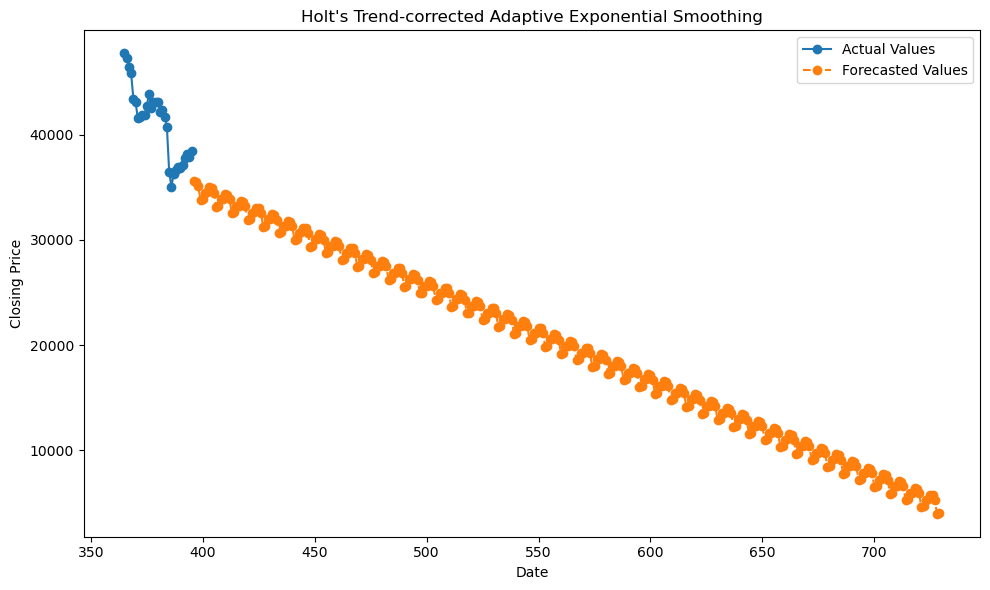

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_january_2022['Price'], label='Actual Values', marker='o')
plt.plot(rest_of_the_year_predictions_trend_2022, label='Forecasted Values', marker='o', linestyle='dashed')

plt.title("Holt's Trend-corrected Adaptive Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
#optimal_alpha

In [55]:
#optimal_beta

In [64]:
rest_of_the_year_predictions_trend_2022.mean()

19888.03259826736

Seasonality

In [65]:
#model = ExponentialSmoothing(bitcoin_january_2022['Price'], trend='add', seasonal='add', seasonal_periods=7, initialization_method="estimated")
#fitted_model = model.fit()
#optimal_alpha = fitted_model.params['smoothing_level']
#optimal_beta = fitted_model.params['smoothing_trend']
#optimal_gamma = fitted_model.params['smoothing_seasonal']
#rest_of_the_year_predictions_seasonality_2022 = fitted_model.forecast(len(bitcoin_rest_of_the_year))
#rest_of_the_year_predictions_seasonality_2022

In [66]:
model = ExponentialSmoothing(bitcoin_january_2022['Price'], trend='add', seasonal='add', seasonal_periods=7)
fitted_model = model.fit(smoothing_level=0.12, smoothing_trend=0.29, smoothing_seasonal=0.55)
rest_of_the_year_predictions_seasonality_2022 = fitted_model.forecast(len(bitcoin_rest_of_the_year))
rest_of_the_year_predictions_seasonality_2022

396    36493.779134
397    36698.125767
398    36887.349715
399    36357.590390
400    36434.081780
           ...     
724    16867.401360
725    17642.105192
726    17846.451824
727    18035.675772
728    17505.916448
Length: 333, dtype: float64

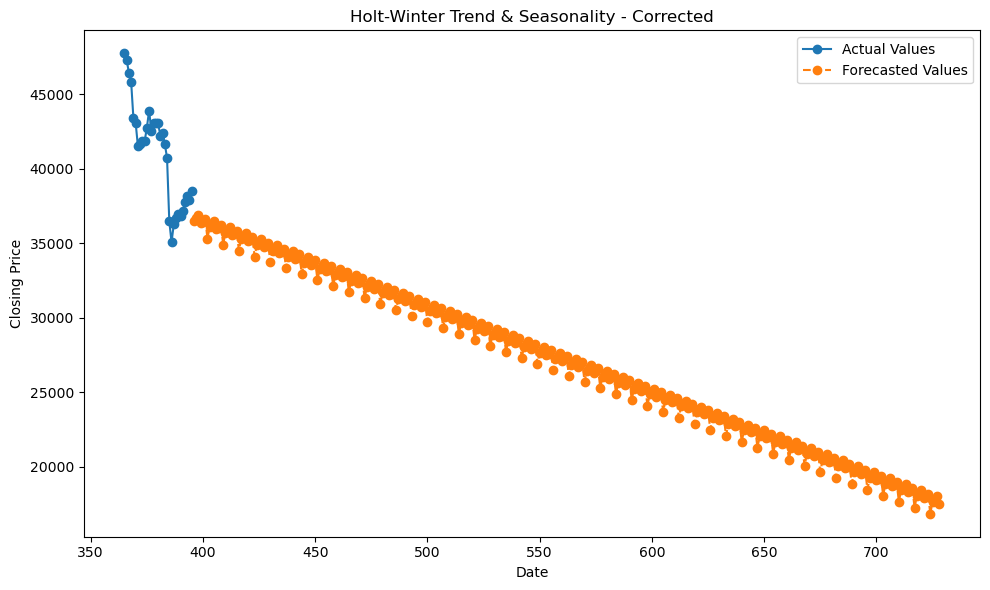

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_january_2022['Price'], label='Actual Values', marker='o')
plt.plot(rest_of_the_year_predictions_seasonality_2022, label='Forecasted Values', marker='o', linestyle='dashed')

plt.title("Holt-Winter Trend & Seasonality - Corrected")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
#optimal_alpha

In [69]:
#optimal_beta

In [70]:
#optimal_gamma

In [71]:
rest_of_the_year_predictions_seasonality_2022.mean()

27067.995759433907

Load dataset Avalanche

In [73]:
avalanche = pd.read_csv('Avalanche Historical Data.csv', parse_dates=['Date'])
avalanche

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,10.90,10.87,11.05,10.84,566.02K,0.27%
1,2022-12-30,10.87,10.98,10.98,10.63,1.20M,-1.01%
2,2022-12-29,10.98,11.21,11.22,10.63,1.29M,-2.05%
3,2022-12-28,11.21,11.64,11.66,11.11,1.25M,-3.76%
4,2022-12-27,11.65,11.72,11.79,11.55,1.08M,-0.60%
...,...,...,...,...,...,...,...
723,2021-01-07,4.47,4.60,4.78,4.47,NaN,-2.21%
724,2021-01-06,4.57,4.25,4.88,4.25,NaN,7.58%
725,2021-01-05,4.25,3.61,4.32,3.57,NaN,17.94%
726,2021-01-04,3.60,3.48,3.83,3.29,NaN,3.80%


In [74]:
#preview datatypes
avalanche.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [75]:
#check for nulls
avalanche.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.        253
Change %      0
dtype: int64

In [76]:
# sort df
avalanche = avalanche.sort_values(by='Date', ascending=True).reset_index(drop=True)
avalanche

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-03,3.47,3.50,3.75,3.47,NaN,-0.69%
1,2021-01-04,3.60,3.48,3.83,3.29,NaN,3.80%
2,2021-01-05,4.25,3.61,4.32,3.57,NaN,17.94%
3,2021-01-06,4.57,4.25,4.88,4.25,NaN,7.58%
4,2021-01-07,4.47,4.60,4.78,4.47,NaN,-2.21%
...,...,...,...,...,...,...,...
723,2022-12-27,11.65,11.72,11.79,11.55,1.08M,-0.60%
724,2022-12-28,11.21,11.64,11.66,11.11,1.25M,-3.76%
725,2022-12-29,10.98,11.21,11.22,10.63,1.29M,-2.05%
726,2022-12-30,10.87,10.98,10.98,10.63,1.20M,-1.01%


In [82]:
#create dataframe avalanche_monthly_2022

avalanche_monthly_2022 = avalanche[(avalanche['Date'].dt.day == 15) & (avalanche['Date'].dt.year == 2022)]
avalanche_monthly_2022.reset_index()
avalanche_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
377,2022-01-15,93.07,90.41,94.37,89.53,1.04M,2.97%
408,2022-02-15,92.97,81.97,93.62,81.45,2.50M,13.42%
436,2022-03-15,69.83,68.99,72.12,66.12,157.32M,1.22%
467,2022-04-15,77.44,76.80,78.50,74.87,1.38M,0.83%
497,2022-05-15,36.56,33.92,36.95,31.92,3.80M,7.77%
528,2022-06-15,18.34,16.57,18.47,14.55,11.48M,10.67%
558,2022-07-15,19.36,19.76,20.19,19.11,3.71M,-2.02%
589,2022-08-15,27.89,28.18,29.29,27.10,2.39M,-1.06%
620,2022-09-15,18.20,19.12,19.36,18.09,2.64M,-4.82%
650,2022-10-15,15.43,15.68,15.76,15.37,627.94K,-1.60%


In [78]:
avalanche.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly Avalanche 2022

In [85]:
avalanche_monthly_2022_jan=avalanche_monthly_2022.iloc[0:2]
avalanche_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
377,2022-01-15,93.07,90.41,94.37,89.53,1.04M,2.97%
408,2022-02-15,92.97,81.97,93.62,81.45,2.50M,13.42%


In [86]:
avalanche_monthly_2022_rest=avalanche_monthly_2022.iloc[2:]
avalanche_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
436,2022-03-15,69.83,68.99,72.12,66.12,157.32M,1.22%
467,2022-04-15,77.44,76.80,78.50,74.87,1.38M,0.83%
497,2022-05-15,36.56,33.92,36.95,31.92,3.80M,7.77%
528,2022-06-15,18.34,16.57,18.47,14.55,11.48M,10.67%
558,2022-07-15,19.36,19.76,20.19,19.11,3.71M,-2.02%
589,2022-08-15,27.89,28.18,29.29,27.10,2.39M,-1.06%
620,2022-09-15,18.20,19.12,19.36,18.09,2.64M,-4.82%
650,2022-10-15,15.43,15.68,15.76,15.37,627.94K,-1.60%
681,2022-11-15,13.51,13.13,14.00,13.02,1.66M,2.90%
711,2022-12-15,13.18,13.71,13.88,13.10,1.26M,-3.87%


In [87]:
avalanche.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [88]:
model = ExponentialSmoothing(avalanche_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_avalanche_trend_2022 = fitted_model.forecast(len(avalanche_monthly_2022_rest))
rest_of_the_year_avalanche_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     92.869522
3     92.769323
4     92.669124
5     92.568925
6     92.468727
7     92.368528
8     92.268329
9     92.168130
10    92.067931
11    91.967732
dtype: float64

In [89]:
rest_of_the_year_avalanche_trend_2022.mean()

92.41862706908287

Load Cardano dataset

In [91]:
cardano = pd.read_csv('Cardano Historical Data.csv', parse_dates=['Date'])
cardano

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,0.2456,0.2457,0.2518,0.2442,98.57M,0.00%
1,2022-12-30,0.2457,0.2439,0.2461,0.2395,112.29M,0.71%
2,2022-12-29,0.2439,0.2482,0.2483,0.2402,165.75M,-1.73%
3,2022-12-28,0.2482,0.2603,0.2609,0.2473,156.85M,-4.66%
4,2022-12-27,0.2603,0.2652,0.2662,0.2563,91.98M,-1.84%
...,...,...,...,...,...,...,...
725,2021-01-05,0.2586,0.2258,0.2639,0.2072,2.21B,14.52%
726,2021-01-04,0.2258,0.2057,0.2396,0.1927,2.23B,9.82%
727,2021-01-03,0.2057,0.1773,0.2096,0.1729,1.39B,15.97%
728,2021-01-02,0.1773,0.1751,0.1845,0.1686,980.36M,1.31%


In [92]:
#preview datatypes
cardano.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [93]:
#check for nulls
cardano.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64

In [94]:
## sort df
cardano = cardano.sort_values(by='Date', ascending=True).reset_index(drop=True)
cardano

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,0.1750,0.1814,0.1846,0.1702,770.70M,-3.49%
1,2021-01-02,0.1773,0.1751,0.1845,0.1686,980.36M,1.31%
2,2021-01-03,0.2057,0.1773,0.2096,0.1729,1.39B,15.97%
3,2021-01-04,0.2258,0.2057,0.2396,0.1927,2.23B,9.82%
4,2021-01-05,0.2586,0.2258,0.2639,0.2072,2.21B,14.52%
...,...,...,...,...,...,...,...
725,2022-12-27,0.2603,0.2652,0.2662,0.2563,91.98M,-1.84%
726,2022-12-28,0.2482,0.2603,0.2609,0.2473,156.85M,-4.66%
727,2022-12-29,0.2439,0.2482,0.2483,0.2402,165.75M,-1.73%
728,2022-12-30,0.2457,0.2439,0.2461,0.2395,112.29M,0.71%


In [95]:
#create dataframe cardano_monthly_2022

cardano_monthly_2022 = cardano[(cardano['Date'].dt.day == 15) & (cardano['Date'].dt.year == 2022)]
cardano_monthly_2022.reset_index()
cardano_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,1.2922,1.2927,1.3177,1.2519,127.21M,-0.04%
410,2022-02-15,1.1063,1.0497,1.1146,1.0492,216.58M,5.39%
438,2022-03-15,0.7990,0.8031,0.8163,0.7835,128.30M,-0.51%
469,2022-04-15,0.9553,0.9327,0.9588,0.9300,69.47M,2.42%
499,2022-05-15,0.5979,0.5378,0.5989,0.5151,279.39M,11.17%
530,2022-06-15,0.5351,0.4837,0.5374,0.4490,793.68M,10.62%
560,2022-07-15,0.4417,0.4414,0.4525,0.4329,243.99M,0.06%
591,2022-08-15,0.5499,0.5695,0.5819,0.5435,240.42M,-3.44%
622,2022-09-15,0.4662,0.4811,0.4818,0.4623,186.33M,-3.10%
652,2022-10-15,0.3640,0.3668,0.3699,0.3614,107.51M,-0.78%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly Cardano 2022

In [96]:
cardano_monthly_2022_jan=cardano_monthly_2022.iloc[0:2]
cardano_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,1.2922,1.2927,1.3177,1.2519,127.21M,-0.04%
410,2022-02-15,1.1063,1.0497,1.1146,1.0492,216.58M,5.39%


In [97]:
cardano_monthly_2022_rest=cardano_monthly_2022.iloc[2:]
cardano_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,0.7990,0.8031,0.8163,0.7835,128.30M,-0.51%
469,2022-04-15,0.9553,0.9327,0.9588,0.9300,69.47M,2.42%
499,2022-05-15,0.5979,0.5378,0.5989,0.5151,279.39M,11.17%
530,2022-06-15,0.5351,0.4837,0.5374,0.4490,793.68M,10.62%
560,2022-07-15,0.4417,0.4414,0.4525,0.4329,243.99M,0.06%
591,2022-08-15,0.5499,0.5695,0.5819,0.5435,240.42M,-3.44%
622,2022-09-15,0.4662,0.4811,0.4818,0.4623,186.33M,-3.10%
652,2022-10-15,0.3640,0.3668,0.3699,0.3614,107.51M,-0.78%
683,2022-11-15,0.3371,0.3321,0.3447,0.3299,130.49M,1.52%
713,2022-12-15,0.3002,0.3079,0.3086,0.2975,121.12M,-2.52%


In [98]:
model = ExponentialSmoothing(cardano_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_cardano_trend_2022 = fitted_model.forecast(len(cardano_monthly_2022_rest))
rest_of_the_year_cardano_trend_2022


C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     0.919512
3     0.733242
4     0.546972
5     0.360702
6     0.174433
7    -0.011837
8    -0.198107
9    -0.384376
10   -0.570646
11   -0.756916
dtype: float64

In [100]:
rest_of_the_year_cardano_trend_2022.mean()

0.08129786134471659

Load dataset Chainlink

In [102]:
chainlink = pd.read_csv('Chainlink Historical Data.csv', parse_dates=['Date'])
chainlink

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,5.57,5.48,5.62,5.39,2.79M,1.74%
1,2022-12-30,5.48,5.60,5.64,5.42,3.86M,-2.23%
2,2022-12-29,5.60,5.67,5.72,5.52,4.12M,-1.31%
3,2022-12-28,5.67,5.90,5.91,5.64,3.88M,-3.74%
4,2022-12-27,5.90,6.04,6.06,5.86,2.90M,-2.45%
...,...,...,...,...,...,...,...
725,2021-01-05,14.51,13.60,14.87,13.12,20.19M,6.55%
726,2021-01-04,13.62,13.70,15.58,12.41,32.77M,-0.62%
727,2021-01-03,13.70,12.21,13.99,11.84,21.83M,12.17%
728,2021-01-02,12.21,11.84,12.38,11.46,13.09M,3.13%


In [103]:
#preview datatypes
chainlink.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [104]:
#check for nulls
chainlink.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [105]:
# sort df
chainlink = chainlink.sort_values(by='Date', ascending=True).reset_index(drop=True)
chainlink

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,11.84,11.23,12.42,11.07,11.93M,5.44%
1,2021-01-02,12.21,11.84,12.38,11.46,13.09M,3.13%
2,2021-01-03,13.70,12.21,13.99,11.84,21.83M,12.17%
3,2021-01-04,13.62,13.70,15.58,12.41,32.77M,-0.62%
4,2021-01-05,14.51,13.60,14.87,13.12,20.19M,6.55%
...,...,...,...,...,...,...,...
725,2022-12-27,5.90,6.04,6.06,5.86,2.90M,-2.45%
726,2022-12-28,5.67,5.90,5.91,5.64,3.88M,-3.74%
727,2022-12-29,5.60,5.67,5.72,5.52,4.12M,-1.31%
728,2022-12-30,5.48,5.60,5.64,5.42,3.86M,-2.23%


In [114]:
#create dataframe chainlink_monthly_2022

chainlink_monthly_2022 = chainlink[(chainlink['Date'].dt.day == 15) & (chainlink['Date'].dt.year == 2022)]
chainlink_monthly_2022.reset_index()
chainlink_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,25.18,25.73,26.20,25.16,5.02M,-2.13%
410,2022-02-15,17.34,15.90,17.45,15.81,4.59M,8.84%
438,2022-03-15,13.69,13.42,13.79,12.89,46.40M,2.01%
469,2022-04-15,14.11,13.65,14.19,13.63,2.06M,3.36%
499,2022-05-15,7.96,7.26,7.98,7.02,5.81M,9.64%
530,2022-06-15,7.32,6.73,7.36,5.85,31.45M,8.77%
560,2022-07-15,6.32,6.27,6.44,6.13,10.48M,0.93%
591,2022-08-15,8.65,8.76,9.05,8.50,5.58M,-1.33%
622,2022-09-15,7.57,7.45,7.60,7.03,7.61M,1.61%
652,2022-10-15,6.89,6.89,6.99,6.83,2.28M,-0.19%


In [115]:
chainlink_monthly_2022_jan=chainlink_monthly_2022.iloc[0:2]
chainlink_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,25.18,25.73,26.20,25.16,5.02M,-2.13%
410,2022-02-15,17.34,15.90,17.45,15.81,4.59M,8.84%


In [116]:
chainlink_monthly_2022_rest=chainlink_monthly_2022.iloc[2:]
chainlink_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,13.69,13.42,13.79,12.89,46.40M,2.01%
469,2022-04-15,14.11,13.65,14.19,13.63,2.06M,3.36%
499,2022-05-15,7.96,7.26,7.98,7.02,5.81M,9.64%
530,2022-06-15,7.32,6.73,7.36,5.85,31.45M,8.77%
560,2022-07-15,6.32,6.27,6.44,6.13,10.48M,0.93%
591,2022-08-15,8.65,8.76,9.05,8.50,5.58M,-1.33%
622,2022-09-15,7.57,7.45,7.60,7.03,7.61M,1.61%
652,2022-10-15,6.89,6.89,6.99,6.83,2.28M,-0.19%
683,2022-11-15,6.42,6.28,6.66,6.23,9.42M,2.17%
713,2022-12-15,6.45,6.72,6.73,6.41,4.37M,-4.08%


In [117]:
model = ExponentialSmoothing(chainlink_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_chainlink_trend_2022 = fitted_model.forecast(len(chainlink_monthly_2022_rest))
rest_of_the_year_chainlink_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2      9.499921
3      1.659860
4     -6.180202
5    -14.020263
6    -21.860325
7    -29.700387
8    -37.540448
9    -45.380510
10   -53.220571
11   -61.060633
dtype: float64

In [118]:
rest_of_the_year_chainlink_trend_2022.mean()

-25.780355771183633

Load dataset Dai

In [120]:
dai = pd.read_csv('Dai Historical Data.csv', parse_dates=['Date'])
dai

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,1.0000,1.0002,1.0002,0.9996,1.02M,-0.02%
1,2022-12-30,1.0002,0.9999,1.0015,0.9996,792.21K,0.03%
2,2022-12-29,0.9999,0.9998,1.0027,0.9996,840.15K,0.01%
3,2022-12-28,0.9998,0.9999,1.0005,0.9991,942.29K,-0.01%
4,2022-12-27,0.9999,1.0001,1.0009,0.9980,2.37M,-0.02%
...,...,...,...,...,...,...,...
725,2021-01-05,1.0005,1.0007,1.0064,0.9988,304.40K,-0.02%
726,2021-01-04,1.0007,1.0024,1.0057,1.0001,411.73K,-0.17%
727,2021-01-03,1.0024,1.0009,1.0067,0.9999,391.68K,0.15%
728,2021-01-02,1.0009,1.0014,1.0080,0.9989,289.84K,-0.08%


In [121]:
#preview datatypes
dai.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [122]:
#check for nulls
dai.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [123]:
# sort df
dai = dai.sort_values(by='Date', ascending=True).reset_index(drop=True)
dai

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,1.0017,1.0023,1.0088,1.0013,61.69K,-0.06%
1,2021-01-02,1.0009,1.0014,1.0080,0.9989,289.84K,-0.08%
2,2021-01-03,1.0024,1.0009,1.0067,0.9999,391.68K,0.15%
3,2021-01-04,1.0007,1.0024,1.0057,1.0001,411.73K,-0.17%
4,2021-01-05,1.0005,1.0007,1.0064,0.9988,304.40K,-0.02%
...,...,...,...,...,...,...,...
725,2022-12-27,0.9999,1.0001,1.0009,0.9980,2.37M,-0.02%
726,2022-12-28,0.9998,0.9999,1.0005,0.9991,942.29K,-0.01%
727,2022-12-29,0.9999,0.9998,1.0027,0.9996,840.15K,0.01%
728,2022-12-30,1.0002,0.9999,1.0015,0.9996,792.21K,0.03%


In [124]:
#create dataframe dai_monthly_2022

dai_monthly_2022 = dai[(dai['Date'].dt.day == 15) & (dai['Date'].dt.year == 2022)]
dai_monthly_2022.reset_index()
dai_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,0.9998,0.9997,1.0009,0.9966,116.81K,0.02%
410,2022-02-15,0.9991,0.9997,1.0000,0.9977,30.87K,-0.05%
438,2022-03-15,1.0006,1.0005,1.0025,0.9965,222.44K,0.01%
469,2022-04-15,0.9988,1.0002,1.0002,0.9972,101.88K,-0.14%
499,2022-05-15,1.0005,1.0008,1.0038,1.0004,397.12K,-0.03%
530,2022-06-15,1.0011,1.0010,1.0024,0.9977,750.98K,0.01%
560,2022-07-15,1.0000,0.9998,1.0000,0.9997,1.77M,0.02%
591,2022-08-15,0.9999,0.9999,1.0001,0.9996,6.51M,0.00%
622,2022-09-15,0.9998,0.9996,1.0001,0.9987,3.81M,0.02%
652,2022-10-15,1.0002,1.0003,1.0004,1.0000,701.42K,0.00%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly Dai 2022

In [125]:
dai_monthly_2022_jan=dai_monthly_2022.iloc[0:2]
dai_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,0.9998,0.9997,1.0009,0.9966,116.81K,0.02%
410,2022-02-15,0.9991,0.9997,1.0000,0.9977,30.87K,-0.05%


In [126]:
dai_monthly_2022_rest=dai_monthly_2022.iloc[2:]
dai_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,1.0006,1.0005,1.0025,0.9965,222.44K,0.01%
469,2022-04-15,0.9988,1.0002,1.0002,0.9972,101.88K,-0.14%
499,2022-05-15,1.0005,1.0008,1.0038,1.0004,397.12K,-0.03%
530,2022-06-15,1.0011,1.0010,1.0024,0.9977,750.98K,0.01%
560,2022-07-15,1.0000,0.9998,1.0000,0.9997,1.77M,0.02%
591,2022-08-15,0.9999,0.9999,1.0001,0.9996,6.51M,0.00%
622,2022-09-15,0.9998,0.9996,1.0001,0.9987,3.81M,0.02%
652,2022-10-15,1.0002,1.0003,1.0004,1.0000,701.42K,0.00%
683,2022-11-15,0.9999,0.9999,1.0006,0.9994,1.33M,0.00%
713,2022-12-15,0.9997,1.0001,1.0003,0.9992,978.87K,-0.04%


In [127]:
model = ExponentialSmoothing(dai_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_dai_trend_2022 = fitted_model.forecast(len(dai_monthly_2022_rest))
rest_of_the_year_dai_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     0.999000
3     0.998651
4     0.998302
5     0.997954
6     0.997605
7     0.997256
8     0.996907
9     0.996559
10    0.996210
11    0.995861
dtype: float64

In [128]:
rest_of_the_year_dai_trend_2022.mean()

0.997430584148114

Load dataset Dogecoin

In [129]:
dogecoin = pd.read_csv('Dogecoin Historical Data.csv', parse_dates=['Date'])
dogecoin

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,0.070144,0.068392,0.071239,0.067988,1.18B,2.56%
1,2022-12-30,0.068395,0.070933,0.071405,0.066392,1.86B,-3.60%
2,2022-12-29,0.070952,0.070376,0.071441,0.069455,1.16B,0.81%
3,2022-12-28,0.070382,0.073704,0.073848,0.069610,2.31B,-4.51%
4,2022-12-27,0.073704,0.075672,0.076088,0.072824,1.04B,-2.61%
...,...,...,...,...,...,...,...
725,2021-01-05,0.009958,0.009784,0.010319,0.008866,15.37B,1.82%
726,2021-01-04,0.009780,0.009845,0.011493,0.007623,38.72B,-0.71%
727,2021-01-03,0.009850,0.010493,0.013928,0.009381,71.68B,-6.09%
728,2021-01-02,0.010489,0.005667,0.014008,0.005553,100.85B,85.27%


In [130]:
#preview datatypes
dogecoin.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [131]:
#check for nulls
dogecoin.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [132]:
# sort df
dogecoin = dogecoin.sort_values(by='Date', ascending=True).reset_index(drop=True)
dogecoin

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,0.005661,0.004666,0.005676,0.004606,8.41B,21.33%
1,2021-01-02,0.010489,0.005667,0.014008,0.005553,100.85B,85.27%
2,2021-01-03,0.009850,0.010493,0.013928,0.009381,71.68B,-6.09%
3,2021-01-04,0.009780,0.009845,0.011493,0.007623,38.72B,-0.71%
4,2021-01-05,0.009958,0.009784,0.010319,0.008866,15.37B,1.82%
...,...,...,...,...,...,...,...
725,2022-12-27,0.073704,0.075672,0.076088,0.072824,1.04B,-2.61%
726,2022-12-28,0.070382,0.073704,0.073848,0.069610,2.31B,-4.51%
727,2022-12-29,0.070952,0.070376,0.071441,0.069455,1.16B,0.81%
728,2022-12-30,0.068395,0.070933,0.071405,0.066392,1.86B,-3.60%


In [133]:
#create dataframe dogecoin_monthly_2022

dogecoin_monthly_2022 = dogecoin[(dogecoin['Date'].dt.day == 15) & (dogecoin['Date'].dt.year == 2022)]
dogecoin_monthly_2022.reset_index()
dogecoin_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,0.184686,0.183131,0.194355,0.181760,2.74B,0.89%
410,2022-02-15,0.151626,0.145778,0.152347,0.144858,966.78M,3.93%
438,2022-03-15,0.112591,0.113975,0.114209,0.110292,346.15M,-1.17%
469,2022-04-15,0.145933,0.144022,0.149694,0.142113,2.06B,1.41%
499,2022-05-15,0.093197,0.089386,0.093197,0.086587,1.16B,4.26%
530,2022-06-15,0.062678,0.055547,0.063649,0.050452,3.69B,12.79%
560,2022-07-15,0.062936,0.062429,0.064359,0.061648,968.14M,0.82%
591,2022-08-15,0.076022,0.080708,0.080895,0.074258,2.50B,-5.81%
622,2022-09-15,0.058617,0.061122,0.061208,0.058498,1.11B,-4.10%
652,2022-10-15,0.058568,0.058663,0.059734,0.058003,366.71M,-0.16%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly Dogecoin 2022

In [134]:
dogecoin_monthly_2022_jan=dogecoin_monthly_2022.iloc[0:2]
dogecoin_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,0.184686,0.183131,0.194355,0.181760,2.74B,0.89%
410,2022-02-15,0.151626,0.145778,0.152347,0.144858,966.78M,3.93%


In [136]:
dogecoin_monthly_2022_rest=dogecoin_monthly_2022.iloc[2:]
dogecoin_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,0.112591,0.113975,0.114209,0.110292,346.15M,-1.17%
469,2022-04-15,0.145933,0.144022,0.149694,0.142113,2.06B,1.41%
499,2022-05-15,0.093197,0.089386,0.093197,0.086587,1.16B,4.26%
530,2022-06-15,0.062678,0.055547,0.063649,0.050452,3.69B,12.79%
560,2022-07-15,0.062936,0.062429,0.064359,0.061648,968.14M,0.82%
591,2022-08-15,0.076022,0.080708,0.080895,0.074258,2.50B,-5.81%
622,2022-09-15,0.058617,0.061122,0.061208,0.058498,1.11B,-4.10%
652,2022-10-15,0.058568,0.058663,0.059734,0.058003,366.71M,-0.16%
683,2022-11-15,0.087030,0.085879,0.089413,0.085163,1.84B,1.34%
713,2022-12-15,0.084790,0.088220,0.088779,0.084204,1.30B,-3.88%


In [137]:
model = ExponentialSmoothing(dogecoin_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_dogecoin_trend_2022 = fitted_model.forecast(len(dogecoin_monthly_2022_rest))
rest_of_the_year_dogecoin_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     0.118335
3     0.085425
4     0.052514
5     0.019603
6    -0.013308
7    -0.046218
8    -0.079129
9    -0.112040
10   -0.144950
11   -0.177861
dtype: float64

In [138]:
rest_of_the_year_dogecoin_trend_2022.mean()

-0.02976291875625529

Load dataset Ethereum

In [139]:
ethereum = pd.read_csv('Ethereum Historical Data.csv', parse_dates=['Date'])
ethereum

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,"1,195.67","1,200.00","1,207.71","1,193.16",150.20K,-0.34%
1,2022-12-30,"1,199.80","1,200.84","1,202.13","1,186.10",285.77K,-0.09%
2,2022-12-29,"1,200.84","1,189.99","1,205.34","1,187.19",272.59K,0.91%
3,2022-12-28,"1,189.98","1,211.60","1,214.32","1,184.22",407.45K,-1.78%
4,2022-12-27,"1,211.60","1,228.22","1,233.15","1,202.02",290.02K,-1.31%
...,...,...,...,...,...,...,...
725,2021-01-05,"1,099.52","1,042.48","1,131.56",976.91,3.25M,5.48%
726,2021-01-04,"1,042.40",977.76,"1,158.27",894.24,5.19M,6.92%
727,2021-01-03,974.97,774.54,"1,008.49",769.57,4.02M,25.88%
728,2021-01-02,774.50,729.00,787.26,715.15,2.25M,6.22%


In [140]:
#preview datatypes
ethereum.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [141]:
#check for nulls
ethereum.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [142]:
# sort df
ethereum = ethereum.sort_values(by='Date', ascending=True).reset_index(drop=True)
ethereum

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,729.12,735.87,748.96,715.74,1.64M,-0.93%
1,2021-01-02,774.50,729.00,787.26,715.15,2.25M,6.22%
2,2021-01-03,974.97,774.54,"1,008.49",769.57,4.02M,25.88%
3,2021-01-04,"1,042.40",977.76,"1,158.27",894.24,5.19M,6.92%
4,2021-01-05,"1,099.52","1,042.48","1,131.56",976.91,3.25M,5.48%
...,...,...,...,...,...,...,...
725,2022-12-27,"1,211.60","1,228.22","1,233.15","1,202.02",290.02K,-1.31%
726,2022-12-28,"1,189.98","1,211.60","1,214.32","1,184.22",407.45K,-1.78%
727,2022-12-29,"1,200.84","1,189.99","1,205.34","1,187.19",272.59K,0.91%
728,2022-12-30,"1,199.80","1,200.84","1,202.13","1,186.10",285.77K,-0.09%


In [143]:
ethereum['Price']=ethereum['Price'].replace(',', '', regex=True).astype(float)

In [144]:
#create dataframe ethereum_monthly_2022

ethereum_monthly_2022 = ethereum[(ethereum['Date'].dt.day == 15) & (ethereum['Date'].dt.year == 2022)]
ethereum_monthly_2022.reset_index()
ethereum_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,3327.74,"3,307.84","3,369.95","3,265.41",292.10K,0.60%
410,2022-02-15,3182.27,"2,929.29","3,193.18","2,912.61",540.04K,8.64%
438,2022-03-15,2617.43,"2,589.54","2,667.61","2,510.75",1.19B,1.09%
469,2022-04-15,3042.01,"3,021.93","3,056.84","2,996.62",309.95K,0.66%
499,2022-05-15,2145.86,"2,056.33","2,161.78","2,001.74",589.77K,4.36%
530,2022-06-15,1237.92,"1,208.82","1,244.80","1,016.99",3.73M,2.24%
560,2022-07-15,1231.03,"1,192.83","1,284.76","1,182.22",1.74M,3.21%
591,2022-08-15,1900.25,"1,935.10","2,012.02","1,873.70",1.09M,-1.80%
622,2022-09-15,1472.64,"1,637.89","1,653.55","1,461.16",1.66M,-10.09%
652,2022-10-15,1274.57,"1,296.74","1,301.48","1,264.86",321.11K,-1.71%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly Ethereum 2022

In [145]:
ethereum_monthly_2022_jan=ethereum_monthly_2022.iloc[0:2]
ethereum_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,3327.74,"3,307.84","3,369.95","3,265.41",292.10K,0.60%
410,2022-02-15,3182.27,"2,929.29","3,193.18","2,912.61",540.04K,8.64%


In [146]:
ethereum_monthly_2022_rest=ethereum_monthly_2022.iloc[2:]
ethereum_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,2617.43,"2,589.54","2,667.61","2,510.75",1.19B,1.09%
469,2022-04-15,3042.01,"3,021.93","3,056.84","2,996.62",309.95K,0.66%
499,2022-05-15,2145.86,"2,056.33","2,161.78","2,001.74",589.77K,4.36%
530,2022-06-15,1237.92,"1,208.82","1,244.80","1,016.99",3.73M,2.24%
560,2022-07-15,1231.03,"1,192.83","1,284.76","1,182.22",1.74M,3.21%
591,2022-08-15,1900.25,"1,935.10","2,012.02","1,873.70",1.09M,-1.80%
622,2022-09-15,1472.64,"1,637.89","1,653.55","1,461.16",1.66M,-10.09%
652,2022-10-15,1274.57,"1,296.74","1,301.48","1,264.86",321.11K,-1.71%
683,2022-11-15,1253.45,"1,242.64","1,289.21","1,235.39",686.18K,0.87%
713,2022-12-15,1266.32,"1,307.29","1,311.07","1,260.89",446.34K,-3.13%


In [147]:
model = ExponentialSmoothing(ethereum_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_ethereum_trend_2022 = fitted_model.forecast(len(ethereum_monthly_2022_rest))
rest_of_the_year_ethereum_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     3036.800001
3     2891.329996
4     2745.859991
5     2600.389986
6     2454.919982
7     2309.449977
8     2163.979972
9     2018.509967
10    1873.039963
11    1727.569958
dtype: float64

In [148]:
rest_of_the_year_ethereum_trend_2022.mean()

2382.1849792653097

Load dataset Litecoin

In [149]:
litecoin = pd.read_csv('Litecoin Historical Data.csv',parse_dates=['Date'])
litecoin

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,70.080,67.940,71.030,67.620,563.95K,3.15%
1,2022-12-30,67.940,66.660,68.440,66.090,476.53K,1.92%
2,2022-12-29,66.660,66.320,67.240,65.580,498.34K,0.51%
3,2022-12-28,66.320,68.680,69.450,65.730,693.14K,-3.44%
4,2022-12-27,68.680,70.770,71.020,67.810,688.64K,-2.95%
...,...,...,...,...,...,...,...
725,2021-01-05,158.432,155.461,162.548,146.542,383.44M,1.87%
726,2021-01-04,155.518,161.310,173.625,140.003,519.23M,-3.50%
727,2021-01-03,161.151,136.932,164.398,135.401,394.35M,17.82%
728,2021-01-02,136.781,126.232,140.646,123.153,283.31M,8.30%


In [150]:
#preview datatypes
litecoin.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [151]:
#check for nulls
litecoin.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [152]:
# sort df
litecoin = litecoin.sort_values(by='Date', ascending=True).reset_index(drop=True)
litecoin

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,126.302,124.162,133.919,122.943,257.82M,1.72%
1,2021-01-02,136.781,126.232,140.646,123.153,283.31M,8.30%
2,2021-01-03,161.151,136.932,164.398,135.401,394.35M,17.82%
3,2021-01-04,155.518,161.310,173.625,140.003,519.23M,-3.50%
4,2021-01-05,158.432,155.461,162.548,146.542,383.44M,1.87%
...,...,...,...,...,...,...,...
725,2022-12-27,68.680,70.770,71.020,67.810,688.64K,-2.95%
726,2022-12-28,66.320,68.680,69.450,65.730,693.14K,-3.44%
727,2022-12-29,66.660,66.320,67.240,65.580,498.34K,0.51%
728,2022-12-30,67.940,66.660,68.440,66.090,476.53K,1.92%


In [153]:
#create dataframe litecoin_monthly_2022

litecoin_monthly_2022 = litecoin[(litecoin['Date'].dt.day == 15) & (litecoin['Date'].dt.year == 2022)]
litecoin_monthly_2022.reset_index()
litecoin_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,147.70,144.70,150.50,144.20,461.87K,2.07%
410,2022-02-15,131.70,124.50,132.40,123.90,371.69K,5.78%
438,2022-03-15,106.80,105.50,108.60,102.50,48.10M,1.04%
469,2022-04-15,110.90,107.40,112.80,107.10,303.13K,3.26%
499,2022-05-15,71.60,68.90,71.70,66.00,507.88K,3.92%
530,2022-06-15,50.65,46.14,50.89,41.74,2.01M,9.51%
560,2022-07-15,51.77,51.29,52.74,50.67,544.24K,0.94%
591,2022-08-15,60.69,63.13,65.31,59.68,521.28K,-3.87%
622,2022-09-15,56.33,60.11,60.81,55.87,696.71K,-6.40%
652,2022-10-15,50.39,51.31,51.66,50.32,230.31K,-1.79%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly Litecoin 2022

In [154]:
litecoin_monthly_2022_jan=litecoin_monthly_2022.iloc[0:2]
litecoin_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,147.7,144.7,150.5,144.2,461.87K,2.07%
410,2022-02-15,131.7,124.5,132.4,123.9,371.69K,5.78%


In [155]:
litecoin_monthly_2022_rest=litecoin_monthly_2022.iloc[2:]
litecoin_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,106.80,105.50,108.60,102.50,48.10M,1.04%
469,2022-04-15,110.90,107.40,112.80,107.10,303.13K,3.26%
499,2022-05-15,71.60,68.90,71.70,66.00,507.88K,3.92%
530,2022-06-15,50.65,46.14,50.89,41.74,2.01M,9.51%
560,2022-07-15,51.77,51.29,52.74,50.67,544.24K,0.94%
591,2022-08-15,60.69,63.13,65.31,59.68,521.28K,-3.87%
622,2022-09-15,56.33,60.11,60.81,55.87,696.71K,-6.40%
652,2022-10-15,50.39,51.31,51.66,50.32,230.31K,-1.79%
683,2022-11-15,58.05,56.62,59.52,56.50,786.14K,2.53%
713,2022-12-15,72.37,75.29,75.44,71.90,600.38K,-3.88%


In [156]:
model = ExponentialSmoothing(litecoin_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_litecoin_trend_2022 = fitted_model.forecast(len(litecoin_monthly_2022_rest))
rest_of_the_year_litecoin_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     115.699840
3      99.699714
4      83.699588
5      67.699463
6      51.699337
7      35.699211
8      19.699086
9       3.698960
10    -12.301166
11    -28.301291
dtype: float64

In [157]:
rest_of_the_year_litecoin_trend_2022.mean()

43.699274055882924

Load dataset Solana

In [158]:
solana = pd.read_csv('Solana Historical Data.csv', parse_dates=['Date'])
solana

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,9.955,9.903,10.170,9.670,6.79M,0.61%
1,2022-12-30,9.895,9.647,10.121,9.029,23.46M,2.45%
2,2022-12-29,9.658,9.760,9.928,8.085,20.96M,-1.04%
3,2022-12-28,9.760,11.090,11.110,9.480,13.99M,-11.99%
4,2022-12-27,11.090,11.339,11.430,10.732,5.10M,-2.20%
...,...,...,...,...,...,...,...
702,2021-01-05,2.155,2.489,2.489,2.093,NaN,-13.39%
703,2021-01-04,2.489,2.161,2.489,1.945,NaN,15.18%
704,2021-01-03,2.161,1.796,2.295,1.796,NaN,20.27%
705,2021-01-02,1.796,1.837,1.986,1.733,NaN,-2.22%


In [159]:
#preview datatypes
solana.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [160]:
#check for nulls
solana.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.        232
Change %      0
dtype: int64

In [161]:
# sort df
solana = solana.sort_values(by='Date', ascending=True).reset_index(drop=True)
solana

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,1.837,1.514,1.837,1.507,NaN,21.34%
1,2021-01-02,1.796,1.837,1.986,1.733,NaN,-2.22%
2,2021-01-03,2.161,1.796,2.295,1.796,NaN,20.27%
3,2021-01-04,2.489,2.161,2.489,1.945,NaN,15.18%
4,2021-01-05,2.155,2.489,2.489,2.093,NaN,-13.39%
...,...,...,...,...,...,...,...
702,2022-12-27,11.090,11.339,11.430,10.732,5.10M,-2.20%
703,2022-12-28,9.760,11.090,11.110,9.480,13.99M,-11.99%
704,2022-12-29,9.658,9.760,9.928,8.085,20.96M,-1.04%
705,2022-12-30,9.895,9.647,10.121,9.029,23.46M,2.45%


In [162]:
#create dataframe solana_monthly_2022

solana_monthly_2022 = solana[(solana['Date'].dt.day == 15) & (solana['Date'].dt.year == 2022)]
solana_monthly_2022.reset_index()
solana_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
356,2022-01-15,147.677,146.158,149.524,144.147,1.52M,1.04%
387,2022-02-15,105.352,96.458,105.606,96.388,3.60M,9.22%
415,2022-03-15,82.850,81.226,85.840,78.887,236.41M,2.00%
446,2022-04-15,101.407,100.777,102.871,99.590,53.65M,0.66%
476,2022-05-15,58.664,52.312,59.243,49.692,5.65M,12.13%
507,2022-06-15,34.708,29.600,34.769,26.798,17.96M,17.12%
537,2022-07-15,37.367,37.139,39.020,36.586,6.75M,0.63%
568,2022-08-15,43.710,44.870,47.192,42.777,6.25M,-2.60%
599,2022-09-15,33.088,34.113,34.755,32.564,4.83M,-3.00%
629,2022-10-15,29.588,30.000,30.197,29.454,1.64M,-1.39%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly Solana 2022

In [163]:
solana_monthly_2022_jan=solana_monthly_2022.iloc[0:2]
solana_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
356,2022-01-15,147.677,146.158,149.524,144.147,1.52M,1.04%
387,2022-02-15,105.352,96.458,105.606,96.388,3.60M,9.22%


In [164]:
solana_monthly_2022_rest=solana_monthly_2022.iloc[2:]
solana_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
415,2022-03-15,82.850,81.226,85.840,78.887,236.41M,2.00%
446,2022-04-15,101.407,100.777,102.871,99.590,53.65M,0.66%
476,2022-05-15,58.664,52.312,59.243,49.692,5.65M,12.13%
507,2022-06-15,34.708,29.600,34.769,26.798,17.96M,17.12%
537,2022-07-15,37.367,37.139,39.020,36.586,6.75M,0.63%
568,2022-08-15,43.710,44.870,47.192,42.777,6.25M,-2.60%
599,2022-09-15,33.088,34.113,34.755,32.564,4.83M,-3.00%
629,2022-10-15,29.588,30.000,30.197,29.454,1.64M,-1.39%
660,2022-11-15,14.315,13.989,15.050,13.832,10.94M,2.33%
690,2022-12-15,14.046,14.124,14.500,13.880,4.65M,-0.55%


In [167]:
model = ExponentialSmoothing(solana_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_solana_trend_2022 = fitted_model.forecast(len(solana_monthly_2022_rest))
rest_of_the_year_solana_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2      63.026576
3      20.701243
4     -21.624089
5     -63.949422
6    -106.274754
7    -148.600086
8    -190.925419
9    -233.250751
10   -275.576084
11   -317.901416
dtype: float64

In [168]:
rest_of_the_year_solana_trend_2022.mean()

-127.43742016257798

Load dataset Tether USD

In [169]:
tether = pd.read_csv('Tether USDt Historical Data.csv', parse_dates=['Date'])
tether

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,0.9999,0.9997,1.0009,0.9997,40.25M,0.02%
1,2022-12-30,0.9997,0.9997,1.0011,0.9996,110.47M,0.00%
2,2022-12-29,0.9997,0.9998,1.0009,0.9997,136.81M,-0.01%
3,2022-12-28,0.9998,0.9998,1.0011,0.9998,154.28M,0.00%
4,2022-12-27,0.9998,1.0000,1.0012,0.9997,135.73M,-0.02%
...,...,...,...,...,...,...,...
725,2021-01-05,1.0019,0.9997,1.0027,0.9992,208.06M,0.19%
726,2021-01-04,1.0000,1.0001,1.0025,0.9986,297.27M,0.00%
727,2021-01-03,1.0000,0.9998,1.0021,0.9982,193.83M,-0.03%
728,2021-01-02,1.0003,1.0018,1.0018,0.9992,183.93M,-0.15%


In [170]:
#preview datatypes
tether.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [171]:
#check for nulls
tether.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [172]:
# sort df
tether = tether.sort_values(by='Date', ascending=True).reset_index(drop=True)
tether

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,1.0018,1.0004,1.0020,0.9998,174.73M,0.13%
1,2021-01-02,1.0003,1.0018,1.0018,0.9992,183.93M,-0.15%
2,2021-01-03,1.0000,0.9998,1.0021,0.9982,193.83M,-0.03%
3,2021-01-04,1.0000,1.0001,1.0025,0.9986,297.27M,0.00%
4,2021-01-05,1.0019,0.9997,1.0027,0.9992,208.06M,0.19%
...,...,...,...,...,...,...,...
725,2022-12-27,0.9998,1.0000,1.0012,0.9997,135.73M,-0.02%
726,2022-12-28,0.9998,0.9998,1.0011,0.9998,154.28M,0.00%
727,2022-12-29,0.9997,0.9998,1.0009,0.9997,136.81M,-0.01%
728,2022-12-30,0.9997,0.9997,1.0011,0.9996,110.47M,0.00%


In [173]:
#create dataframe tether_monthly_2022

tether_monthly_2022 = tether[(tether['Date'].dt.day == 15) & (tether['Date'].dt.year == 2022)]
tether_monthly_2022.reset_index()
tether_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,1.0003,1.0004,1.0005,1.0002,70.80M,-0.01%
410,2022-02-15,1.0006,1.0004,1.0009,1.0004,128.01M,0.01%
438,2022-03-15,1.0005,1.0008,1.0009,1.0004,119.52M,0.00%
469,2022-04-15,1.0002,1.0001,1.0004,1.0001,68.90M,0.02%
499,2022-05-15,0.9991,0.9990,1.0004,0.9989,110.37M,0.01%
530,2022-06-15,0.9994,1.0001,1.0004,0.9986,583.94M,0.02%
560,2022-07-15,0.9998,0.9994,0.9999,0.9994,143.51M,0.04%
591,2022-08-15,1.0001,1.0002,1.0003,1.0000,100.62M,-0.01%
622,2022-09-15,1.0001,1.0004,1.0004,1.0000,135.20M,-0.01%
652,2022-10-15,1.0000,1.0000,1.0003,1.0000,18.48M,0.00%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly Tether 2022

In [174]:
tether_monthly_2022_jan=tether_monthly_2022.iloc[0:2]
tether_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,1.0003,1.0004,1.0005,1.0002,70.80M,-0.01%
410,2022-02-15,1.0006,1.0004,1.0009,1.0004,128.01M,0.01%


In [175]:
tether_monthly_2022_rest=tether_monthly_2022.iloc[2:]
tether_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,1.0005,1.0008,1.0009,1.0004,119.52M,0.00%
469,2022-04-15,1.0002,1.0001,1.0004,1.0001,68.90M,0.02%
499,2022-05-15,0.9991,0.9990,1.0004,0.9989,110.37M,0.01%
530,2022-06-15,0.9994,1.0001,1.0004,0.9986,583.94M,0.02%
560,2022-07-15,0.9998,0.9994,0.9999,0.9994,143.51M,0.04%
591,2022-08-15,1.0001,1.0002,1.0003,1.0000,100.62M,-0.01%
622,2022-09-15,1.0001,1.0004,1.0004,1.0000,135.20M,-0.01%
652,2022-10-15,1.0000,1.0000,1.0003,1.0000,18.48M,0.00%
683,2022-11-15,0.9990,0.9991,1.0006,0.9987,276.11M,-0.01%
713,2022-12-15,1.0002,1.0005,1.0007,1.0000,153.41M,0.01%


In [176]:
model = ExponentialSmoothing(tether_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_tether_trend_2022 = fitted_model.forecast(len(tether_monthly_2022_rest))
rest_of_the_year_tether_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     1.000643
3     1.000792
4     1.000942
5     1.001091
6     1.001241
7     1.001390
8     1.001540
9     1.001689
10    1.001838
11    1.001988
dtype: float64

In [177]:
rest_of_the_year_tether_trend_2022.mean()

1.0013154029166103

Load dataset USD Coin

In [178]:
usd = pd.read_csv('USD Coin Historical Data.csv', parse_dates=['Date'])
usd

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,1.0004,1.0005,1.0007,1.0003,34.83M,-0.01%
1,2022-12-30,1.0005,1.0004,1.0007,1.0002,60.59M,0.01%
2,2022-12-29,1.0004,1.0004,1.0006,1.0002,60.38M,0.00%
3,2022-12-28,1.0004,1.0004,1.0005,1.0001,64.98M,0.00%
4,2022-12-27,1.0004,1.0002,1.0006,1.0000,59.38M,0.02%
...,...,...,...,...,...,...,...
725,2021-01-05,0.9968,0.9994,0.9998,0.9961,140.69M,-0.26%
726,2021-01-04,0.9994,0.9991,1.0140,0.9941,229.55M,0.03%
727,2021-01-03,0.9991,0.9990,1.0112,0.9905,202.14M,0.01%
728,2021-01-02,0.9990,0.9974,1.0005,0.9969,157.78M,0.16%


In [179]:
#preview datatypes
usd.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [180]:
#check for nulls
usd.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        26
Change %     0
dtype: int64

In [181]:
# sort df
usd = usd.sort_values(by='Date', ascending=True).reset_index(drop=True)
usd

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,0.9974,0.9984,0.9985,0.9968,71.39M,-0.10%
1,2021-01-02,0.9990,0.9974,1.0005,0.9969,157.78M,0.16%
2,2021-01-03,0.9991,0.9990,1.0112,0.9905,202.14M,0.01%
3,2021-01-04,0.9994,0.9991,1.0140,0.9941,229.55M,0.03%
4,2021-01-05,0.9968,0.9994,0.9998,0.9961,140.69M,-0.26%
...,...,...,...,...,...,...,...
725,2022-12-27,1.0004,1.0002,1.0006,1.0000,59.38M,0.02%
726,2022-12-28,1.0004,1.0004,1.0005,1.0001,64.98M,0.00%
727,2022-12-29,1.0004,1.0004,1.0006,1.0002,60.38M,0.00%
728,2022-12-30,1.0005,1.0004,1.0007,1.0002,60.59M,0.01%


In [182]:
#create dataframe usd_monthly_2022

usd_monthly_2022 = usd[(usd['Date'].dt.day == 15) & (usd['Date'].dt.year == 2022)]
usd_monthly_2022.reset_index()
usd_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,0.9995,0.9996,0.9998,0.9995,78.12M,-0.01%
410,2022-02-15,0.9994,0.9996,0.9997,0.9992,110.39M,-0.03%
438,2022-03-15,0.9997,0.9998,0.9999,0.9996,145.31M,-0.01%
469,2022-04-15,0.9998,1.0000,1.0000,0.9997,152.18M,-0.02%
499,2022-05-15,1.0011,1.0014,1.0017,1.0010,272.95M,-0.03%
530,2022-06-15,1.0012,1.0011,1.0020,1.0011,1.02B,0.01%
560,2022-07-15,1.0003,1.0007,1.0008,1.0003,282.92M,-0.04%
591,2022-08-15,0.9998,0.9997,0.9999,0.9996,370.21M,0.01%
622,2022-09-15,1.0000,0.9998,1.0003,0.9997,507.70M,0.02%
652,2022-10-15,0.9999,0.9999,0.9999,0.9999,NaN,0.00%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly USD Coin 2022

In [183]:
usd_monthly_2022_jan=usd_monthly_2022.iloc[0:2]
usd_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,0.9995,0.9996,0.9998,0.9995,78.12M,-0.01%
410,2022-02-15,0.9994,0.9996,0.9997,0.9992,110.39M,-0.03%


In [184]:
usd_monthly_2022_rest=usd_monthly_2022.iloc[2:]
usd_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,0.9997,0.9998,0.9999,0.9996,145.31M,-0.01%
469,2022-04-15,0.9998,1.0000,1.0000,0.9997,152.18M,-0.02%
499,2022-05-15,1.0011,1.0014,1.0017,1.0010,272.95M,-0.03%
530,2022-06-15,1.0012,1.0011,1.0020,1.0011,1.02B,0.01%
560,2022-07-15,1.0003,1.0007,1.0008,1.0003,282.92M,-0.04%
591,2022-08-15,0.9998,0.9997,0.9999,0.9996,370.21M,0.01%
622,2022-09-15,1.0000,0.9998,1.0003,0.9997,507.70M,0.02%
652,2022-10-15,0.9999,0.9999,0.9999,0.9999,NaN,0.00%
683,2022-11-15,1.0012,1.0013,1.0018,1.0009,56.67M,-0.01%
713,2022-12-15,0.9999,1.0000,1.0001,0.9997,60.44M,-0.01%


In [185]:
model = ExponentialSmoothing(usd_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_usd_trend_2022 = fitted_model.forecast(len(usd_monthly_2022_rest))
rest_of_the_year_usd_trend_2022

C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     0.999233
3     0.999142
4     0.999051
5     0.998960
6     0.998870
7     0.998779
8     0.998688
9     0.998597
10    0.998507
11    0.998416
dtype: float64

In [186]:
rest_of_the_year_usd_trend_2022.mean()

0.9988243749999992

Load dataset bitcoin2

In [189]:
bitcoin2 = pd.read_csv('Bitcoin Historical Data (1).csv', parse_dates=['Date'])
bitcoin2

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-31,"16,537.4","16,607.2","16,635.9","16,487.3",130.44K,-0.42%
1,2022-12-30,"16,607.2","16,636.4","16,644.4","16,360.0",192.76K,-0.18%
2,2022-12-29,"16,636.4","16,546.2","16,659.1","16,496.6",181.47K,0.55%
3,2022-12-28,"16,546.2","16,705.9","16,781.1","16,474.2",217.96K,-0.96%
4,2022-12-27,"16,706.1","16,918.2","16,964.0","16,610.1",192.18K,-1.25%
...,...,...,...,...,...,...,...
725,2021-01-05,"33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%
726,2021-01-04,"32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
727,2021-01-03,"32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
728,2021-01-02,"32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%


In [190]:
#preview datatypes
bitcoin2.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [202]:
bitcoin2['Price'] = bitcoin2['Price'].replace(',', '', regex=True).astype(float)

In [203]:
#preview datatypes
bitcoin2.dtypes

Date        datetime64[ns]
Price              float64
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [204]:
#check for nulls
bitcoin2.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [205]:
#sort df
bitcoin2 = bitcoin2.sort_values(by='Date', ascending=True).reset_index(drop=True)
bitcoin2

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,29359.9,"28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,32193.3,"29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,32958.9,"32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,32022.6,"33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,33991.5,"32,015.4","34,414.7","30,010.5",202.13K,6.15%
...,...,...,...,...,...,...,...
725,2022-12-27,16706.1,"16,918.2","16,964.0","16,610.1",192.18K,-1.25%
726,2022-12-28,16546.2,"16,705.9","16,781.1","16,474.2",217.96K,-0.96%
727,2022-12-29,16636.4,"16,546.2","16,659.1","16,496.6",181.47K,0.55%
728,2022-12-30,16607.2,"16,636.4","16,644.4","16,360.0",192.76K,-0.18%


In [206]:
#create dataframe bitcoin2_monthly_2022

bitcoin2_monthly_2022 = bitcoin2[(bitcoin2['Date'].dt.day == 15) & (bitcoin2['Date'].dt.year == 2022)]
bitcoin2_monthly_2022.reset_index()
bitcoin2_monthly_2022

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,43097.0,"43,073.6","43,777.9","42,586.1",31.44K,0.06%
410,2022-02-15,44544.4,"42,550.3","44,722.6","42,460.1",56.34K,4.69%
438,2022-03-15,39285.7,"39,673.0","39,854.7","38,220.9",2.25B,-0.97%
469,2022-04-15,40560.0,"39,936.0","40,850.0","39,781.0",233.09M,1.56%
499,2022-05-15,31308.7,"30,078.6","31,383.8","29,499.4",65.44K,4.08%
530,2022-06-15,22577.9,"22,137.5","22,754.4","20,125.8",280.41K,1.90%
560,2022-07-15,20825.1,"20,586.1","21,178.1","20,393.4",164.67K,1.16%
591,2022-08-15,24101.7,"24,303.3","25,205.7","23,784.5",279.28K,-0.83%
622,2022-09-15,19701.7,"20,222.3","20,321.4","19,532.3",358.42K,-2.58%
652,2022-10-15,19068.7,"19,181.7","19,218.7","19,000.8",123.66K,-0.59%


Holt’s Trend-corrected Adaptive Exponential Smoothing for monthly bitcoin2 Coin 2022

In [207]:
bitcoin2_monthly_2022_jan=bitcoin2_monthly_2022.iloc[0:2]
bitcoin2_monthly_2022_jan

,Date,Price,Open,High,Low,Vol.,Change %
379,2022-01-15,43097.0,"43,073.6","43,777.9","42,586.1",31.44K,0.06%
410,2022-02-15,44544.4,"42,550.3","44,722.6","42,460.1",56.34K,4.69%


In [208]:
bitcoin2_monthly_2022_rest=bitcoin2_monthly_2022.iloc[2:]
bitcoin2_monthly_2022_rest

,Date,Price,Open,High,Low,Vol.,Change %
438,2022-03-15,39285.7,"39,673.0","39,854.7","38,220.9",2.25B,-0.97%
469,2022-04-15,40560.0,"39,936.0","40,850.0","39,781.0",233.09M,1.56%
499,2022-05-15,31308.7,"30,078.6","31,383.8","29,499.4",65.44K,4.08%
530,2022-06-15,22577.9,"22,137.5","22,754.4","20,125.8",280.41K,1.90%
560,2022-07-15,20825.1,"20,586.1","21,178.1","20,393.4",164.67K,1.16%
591,2022-08-15,24101.7,"24,303.3","25,205.7","23,784.5",279.28K,-0.83%
622,2022-09-15,19701.7,"20,222.3","20,321.4","19,532.3",358.42K,-2.58%
652,2022-10-15,19068.7,"19,181.7","19,218.7","19,000.8",123.66K,-0.59%
683,2022-11-15,16895.1,"16,615.0","17,112.0","16,543.9",337.15K,1.69%
713,2022-12-15,17356.1,"17,796.4","17,846.1","17,298.2",263.44K,-2.47%


In [209]:
model = ExponentialSmoothing(bitcoin2_monthly_2022_jan['Price'], trend='add', seasonal_periods=1)
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
rest_of_the_year_bitcoin2_trend_2022 = fitted_model.forecast(len(bitcoin2_monthly_2022_rest))
rest_of_the_year_bitcoin2_trend_2022


C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2     45991.799991
3     47439.200040
4     48886.600088
5     50334.000137
6     51781.400185
7     53228.800233
8     54676.200282
9     56123.600330
10    57571.000378
11    59018.400427
dtype: float64

In [210]:
rest_of_the_year_bitcoin2_trend_2022.mean()

52505.100209149394